### Spam Filtering using Naive Bayes classifiers in order to predict whether a new mail based on its content can be categorized as spam or not-spam.

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMites/spam.tsv',sep='\t',names=['Class','Message'])

In [3]:
data.head()

,Class,Message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5567 non-null   object
 1   Message  5567 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [5]:
data['Length'] = data['Message'].apply(len)

In [6]:
data

,Class,Message,Length
0,ham,I've been searching for the right words to tha...,196
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,"Nah I don't think he goes to usf, he lives aro...",61
3,ham,Even my brother is not like to speak with me. ...,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!,36
...,...,...,...
5562,spam,This is the 2nd time we have tried 2 contact u...,160
5563,ham,Will ü b going to esplanade fr home?,36
5564,ham,"Pity, * was in mood for that. So...any other s...",57
5565,ham,The guy did some bitching but I acted like i'd...,125


In [7]:
data.describe()

,Length
count,5567.000000
mean,80.450153
std,59.891023
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [8]:
data['Class'].value_counts()

ham     4821
spam     746
Name: Class, dtype: int64

In [9]:
data.loc[data['Class']=='ham','Class'] = 1

In [10]:
data.loc[data['Class']=='spam','Class'] = 0

In [11]:
data.head()

,Class,Message,Length
0,1,I've been searching for the right words to tha...,196
1,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,1,"Nah I don't think he goes to usf, he lives aro...",61
3,1,Even my brother is not like to speak with me. ...,77
4,1,I HAVE A DATE ON SUNDAY WITH WILL!!!,36


In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punct(text):
  text = "".join([i for i in text if i not in string.punctuation])
  return text

In [14]:
text = []
for i in data['Message']:
  t = remove_punct(i)
  text.append(t)

In [15]:
data['Text_clean'] = text

In [16]:
data.head()

,Class,Message,Length,Text_clean
0,1,I've been searching for the right words to tha...,196,Ive been searching for the right words to than...
1,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...
2,1,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...
3,1,Even my brother is not like to speak with me. ...,77,Even my brother is not like to speak with me T...
4,1,I HAVE A DATE ON SUNDAY WITH WILL!!!,36,I HAVE A DATE ON SUNDAY WITH WILL


In [17]:
X = data['Text_clean']
y = data['Class']

In [18]:
y = y.astype('int')

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
CV = CountVectorizer(stop_words='english')

In [21]:
X_train_CV = CV.fit_transform(X_train)

In [22]:
X_test_CV = CV.transform(X_test)  #transform() is used to avoid the data leakage

In [23]:
CV.get_feature_names_out()

array(['0089my', '0121', '01223585236', ..., 'zyada', 'üll', '〨ud'],
      dtype=object)

In [24]:
NB = MultinomialNB()

In [25]:
NB.fit(X=X_train_CV, y=y_train)

MultinomialNB()

In [26]:
y_preds = NB.predict(X_test_CV)

In [27]:
y_preds

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       145
           1       0.99      0.99      0.99       969

    accuracy                           0.99      1114
   macro avg       0.98      0.98      0.98      1114
weighted avg       0.99      0.99      0.99      1114



In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

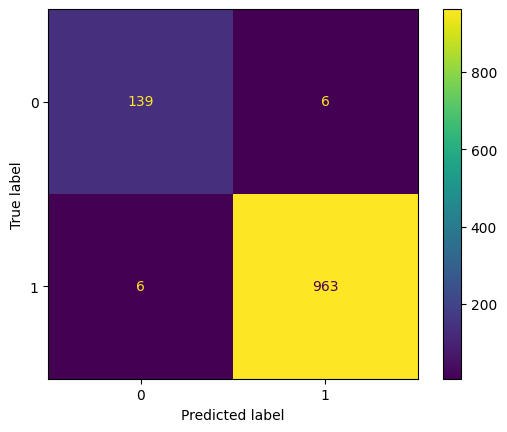

In [30]:
cm = confusion_matrix(y_test, y_preds, labels=NB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=NB.classes_)

disp.plot()
plt.show()

* see how smote works

In [31]:
bnb = BernoulliNB()

In [32]:
bnb.fit(X_train_CV,y_train)
y_preds1 = bnb.predict(X_test_CV)

In [33]:
print(classification_report(y_test,y_preds1))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       145
           1       0.97      1.00      0.99       969

    accuracy                           0.97      1114
   macro avg       0.98      0.90      0.94      1114
weighted avg       0.97      0.97      0.97      1114



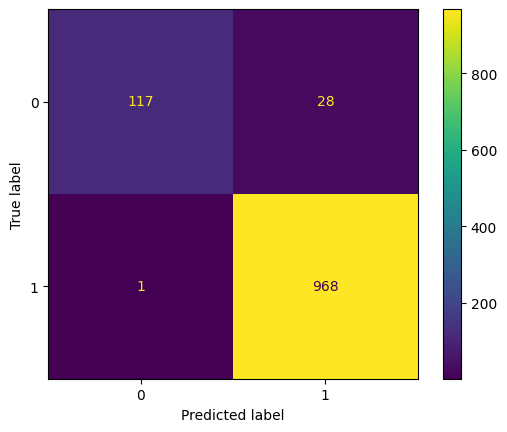

In [34]:
cm1 = confusion_matrix(y_test, y_preds1, labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,
                               display_labels=bnb.classes_)

disp.plot()
plt.show()